# CRM Call Logs - Ivan Sebastian

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

In [2]:
cc_logs = pd.read_csv('CRM Call Center Logs.csv')
events = pd.read_csv('CRM Events.csv')

In [3]:
cc_logs.head()

,Date received,Complaint ID,rand client,phonefinal,vru+line,call_id,priority,type,outcome,server,ser_start,ser_exit,ser_time
0,2017-03-27,CR2406263,C00004587,977-806-9726,AA0103,34536.0,0.0,NW,AGENT,MICHAL,13:34:11,13:40:23,00:06:12
1,2017-03-27,CR2405641,C00003328,322-598-7152,AA0205,34537.0,0.0,PS,AGENT,TOVA,10:58:22,11:16:10,00:17:48
2,2017-03-27,CR2405629,C00001685,508-311-5237,AA0110,34538.0,2.0,PS,AGENT,YIFAT,13:00:54,13:13:31,00:12:37
3,2017-03-23,CR2400594,C00001945,265-394-2727,AA0113,34540.0,2.0,PS,AGENT,AVNI,16:18:21,16:19:40,00:01:19
4,2017-03-22,CR2399607,C00004303,206-008-0460,AA0102,34541.0,1.0,PS,AGENT,STEREN,14:48:22,14:55:19,00:06:57


In [4]:
cc_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date received  3999 non-null   object 
 1   Complaint ID   2504 non-null   object 
 2   rand client    2504 non-null   object 
 3   phonefinal     3999 non-null   object 
 4   vru+line       3015 non-null   object 
 5   call_id        3015 non-null   float64
 6   priority       3015 non-null   float64
 7   type           3015 non-null   object 
 8   outcome        3015 non-null   object 
 9   server         3015 non-null   object 
 10  ser_start      3999 non-null   object 
 11  ser_exit       3999 non-null   object 
 12  ser_time       3999 non-null   object 
dtypes: float64(2), object(11)
memory usage: 406.3+ KB


In [5]:
events.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Client_ID
0,2014-07-03,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,NaN,Email,2014-07-09,Closed with explanation,Yes,No,CR0922485,C00001925
1,2012-04-12,Bank account or service,Savings account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-13,Closed with relief,Yes,No,CR0057298,C00003141
2,2012-04-03,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-04-03,Closed without relief,Yes,No,CR0043811,C00000297
3,2012-03-14,Credit card,NaN,Billing disputes,NaN,NaN,NaN,NaN,Email,2012-03-14,Closed with relief,Yes,No,CR0035411,C00004275
4,2012-03-05,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,NaN,Email,2012-03-06,Closed with relief,Yes,No,CR0030939,C00000900


In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23419 entries, 0 to 23418
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 23419 non-null  object 
 1   Product                       23419 non-null  object 
 2   Sub-product                   14091 non-null  object 
 3   Issue                         23419 non-null  object 
 4   Sub-issue                     0 non-null      float64
 5   Consumer complaint narrative  4467 non-null   object 
 6   Tags                          3276 non-null   object 
 7   Consumer consent provided?    6872 non-null   object 
 8   Submitted via                 23419 non-null  object 
 9   Date sent to company          23419 non-null  object 
 10  Company response to consumer  23419 non-null  object 
 11  Timely response?              23419 non-null  object 
 12  Consumer disputed?            22417 non-null  object 
 13  C

It seems we have multiple complaints from the same person, we can see it from the "phonefinal" columns since some value in "rand client" columns have missing value.

In [7]:
cc_logs.describe(exclude='number')

,Date received,Complaint ID,rand client,phonefinal,vru+line,type,outcome,server,ser_start,ser_exit,ser_time
count,3999,2504,2504,3999,3015,3015,3015,3015,3999,3999,3999
unique,1842,2504,2019,2744,27,6,3,25,3733,3738,1303
top,2012-04-11,CR0040526,C00002447,259-090-1827,AA0213,PS,AGENT,NO_SERVER,12:46:34,11:00:43,00:00:04
freq,8,1,5,8,183,1996,2580,488,4,4,96


In [8]:
cc_logs['hour'] = pd.to_datetime(cc_logs['ser_time'], format='%H:%M:%S').dt.hour
cc_logs['minute'] = pd.to_datetime(cc_logs['ser_time'], format='%H:%M:%S').dt.minute
cc_logs['seconds'] = pd.to_datetime(cc_logs['ser_time'], format='%H:%M:%S').dt.second
cc_logs['ser_time(secs)'] = cc_logs['hour'] * 3600 + cc_logs['minute'] *60 + cc_logs['seconds']

## Joining the 2 Datasets with Left Join (Left being "Call Logs Dataset")

In [9]:
df = cc_logs.join(events.set_index('Complaint ID'), on='Complaint ID', how='left', lsuffix='_cclogs', rsuffix='_events')
df

,Date received_cclogs,Complaint ID,rand client,phonefinal,vru+line,call_id,priority,type,outcome,server,...,Sub-issue,Consumer complaint narrative,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Client_ID
0,2017-03-27,CR2406263,C00004587,977-806-9726,AA0103,34536.0,0.0,NW,AGENT,MICHAL,...,NaN,NaN,Servicemember,NaN,Phone,2017-03-27,In progress,Yes,NaN,C00004587
1,2017-03-27,CR2405641,C00003328,322-598-7152,AA0205,34537.0,0.0,PS,AGENT,TOVA,...,NaN,NaN,NaN,NaN,Phone,2017-03-27,In progress,Yes,NaN,C00003328
2,2017-03-27,CR2405629,C00001685,508-311-5237,AA0110,34538.0,2.0,PS,AGENT,YIFAT,...,NaN,NaN,Older American,NaN,Phone,2017-03-27,In progress,Yes,NaN,C00001685
3,2017-03-23,CR2400594,C00001945,265-394-2727,AA0113,34540.0,2.0,PS,AGENT,AVNI,...,NaN,NaN,NaN,NaN,Phone,2017-03-23,Closed with explanation,Yes,NaN,C00001945
4,2017-03-22,CR2399607,C00004303,206-008-0460,AA0102,34541.0,1.0,PS,AGENT,STEREN,...,NaN,NaN,"Older American, Servicemember",NaN,Phone,2017-03-22,In progress,Yes,NaN,C00004303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2019-10-12,NaN,NaN,703-826-5722,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3995,2014-11-03,NaN,NaN,387-514-1611,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,2016-09-02,NaN,NaN,508-397-7936,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,2015-02-03,NaN,NaN,883-529-9005,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received_cclogs          3999 non-null   object 
 1   Complaint ID                  2504 non-null   object 
 2   rand client                   2504 non-null   object 
 3   phonefinal                    3999 non-null   object 
 4   vru+line                      3015 non-null   object 
 5   call_id                       3015 non-null   float64
 6   priority                      3015 non-null   float64
 7   type                          3015 non-null   object 
 8   outcome                       3015 non-null   object 
 9   server                        3015 non-null   object 
 10  ser_start                     3999 non-null   object 
 11  ser_exit                      3999 non-null   object 
 12  ser_time                      3999 non-null   object 
 13  hou

## Drop columns

Since "Sub-Issue", "Consumer complaint narrative, and "Consumer consent provided?" is empty after i joined it with CRM Events, i will drop the columns and so is other irrelevant columns.

In [11]:
df.drop(['hour', 'minute', 'seconds', 'Sub-issue', 'Client_ID', 'Date received_events', 'vru+line', 'call_id', 'Consumer complaint narrative', 'Consumer consent provided?'], axis=1, inplace=True)
df

,Date received_cclogs,Complaint ID,rand client,phonefinal,priority,type,outcome,server,ser_start,ser_exit,...,ser_time(secs),Product,Sub-product,Issue,Tags,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
0,2017-03-27,CR2406263,C00004587,977-806-9726,0.0,NW,AGENT,MICHAL,13:34:11,13:40:23,...,372,Credit card,NaN,Closing/Cancelling account,Servicemember,Phone,2017-03-27,In progress,Yes,NaN
1,2017-03-27,CR2405641,C00003328,322-598-7152,0.0,PS,AGENT,TOVA,10:58:22,11:16:10,...,1068,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Phone,2017-03-27,In progress,Yes,NaN
2,2017-03-27,CR2405629,C00001685,508-311-5237,2.0,PS,AGENT,YIFAT,13:00:54,13:13:31,...,757,Bank account or service,Checking account,"Account opening, closing, or management",Older American,Phone,2017-03-27,In progress,Yes,NaN
3,2017-03-23,CR2400594,C00001945,265-394-2727,2.0,PS,AGENT,AVNI,16:18:21,16:19:40,...,79,Bank account or service,Checking account,"Account opening, closing, or management",NaN,Phone,2017-03-23,Closed with explanation,Yes,NaN
4,2017-03-22,CR2399607,C00004303,206-008-0460,1.0,PS,AGENT,STEREN,14:48:22,14:55:19,...,417,Credit card,NaN,Identity theft / Fraud / Embezzlement,"Older American, Servicemember",Phone,2017-03-22,In progress,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2019-10-12,NaN,NaN,703-826-5722,NaN,NaN,NaN,NaN,15:48:32,16:07:39,...,1147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3995,2014-11-03,NaN,NaN,387-514-1611,NaN,NaN,NaN,NaN,11:08:45,11:14:31,...,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3996,2016-09-02,NaN,NaN,508-397-7936,NaN,NaN,NaN,NaN,13:08:09,13:24:05,...,956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3997,2015-02-03,NaN,NaN,883-529-9005,NaN,NaN,NaN,NaN,15:47:13,15:50:33,...,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received_cclogs          3999 non-null   object 
 1   Complaint ID                  2504 non-null   object 
 2   rand client                   2504 non-null   object 
 3   phonefinal                    3999 non-null   object 
 4   priority                      3015 non-null   float64
 5   type                          3015 non-null   object 
 6   outcome                       3015 non-null   object 
 7   server                        3015 non-null   object 
 8   ser_start                     3999 non-null   object 
 9   ser_exit                      3999 non-null   object 
 10  ser_time                      3999 non-null   object 
 11  ser_time(secs)                3999 non-null   int64  
 12  Product                       2504 non-null   object 
 13  Sub

## Quick Look

- The Serve Time Data doesn't look like it has any extreme outliers.
- Average Serve Time for the whole Dataset is 10 minutes

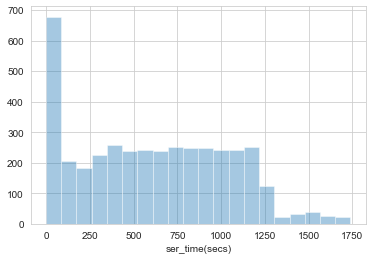

In [13]:
sns.distplot(df['ser_time(secs)'], kde=False)
plt.show()

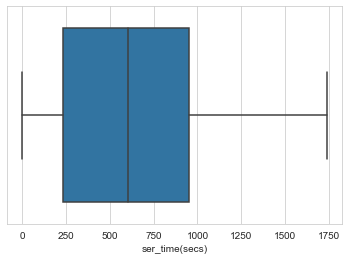

In [14]:
sns.boxplot(df['ser_time(secs)'])
plt.show()

In [15]:
df['ser_time(secs)'].mean()/60

10.100941902142203

I thought complaints from the same person over and over again is because the problem is not resolved well, turns out the complaint differ most of the time, we can see it from the "Date received", "Product", 'Sub-product", and "Issue" columns.

In [16]:
df[df['phonefinal'] == '259-090-1827'].sort_values(by='Date received_cclogs')

,Date received_cclogs,Complaint ID,rand client,phonefinal,priority,type,outcome,server,ser_start,ser_exit,...,ser_time(secs),Product,Sub-product,Issue,Tags,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
1876,2012-06-11,CR0099278,C00001016,259-090-1827,1.0,TT,AGENT,YITZ,13:25:47,13:38:45,...,778,Credit card,NaN,APR or interest rate,Older American,Phone,2012-06-15,Closed with non-monetary relief,Yes,No
1460,2013-06-05,CR0423263,C00001016,259-090-1827,0.0,NW,AGENT,AVNI,09:11:36,09:23:14,...,698,Bank account or service,Checking account,Deposits and withdrawals,NaN,Phone,2013-06-10,Closed with monetary relief,Yes,No
1286,2013-10-22,CR0566404,C00001016,259-090-1827,0.0,TT,AGENT,MIKI,13:36:48,13:53:32,...,1004,Bank account or service,Checking account,Deposits and withdrawals,NaN,Phone,2013-10-22,Closed with monetary relief,Yes,Yes
2069,2015-09-02,NaN,NaN,259-090-1827,0.0,NW,HANG,NO_SERVER,13:27:34,13:27:38,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2637,2015-09-24,CR1577869,C00001016,259-090-1827,0.0,PS,AGENT,AVNI,14:21:44,14:40:55,...,1151,Credit card,NaN,Credit card protection / Debt protection,Older American,Phone,2015-09-24,Closed with explanation,Yes,Yes
3304,2016-11-01,NaN,NaN,259-090-1827,NaN,NaN,NaN,NaN,15:45:43,15:56:10,...,627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2504,2017-03-21,CR2398274,C00001016,259-090-1827,0.0,PS,AGENT,SHLOMO,14:03:50,14:18:45,...,895,Bank account or service,Checking account,"Making/receiving payments, sending money",Older American,Phone,2017-03-21,Closed with monetary relief,Yes,NaN
2202,2019-12-24,NaN,NaN,259-090-1827,0.0,NW,HANG,NO_SERVER,12:33:14,12:33:19,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Product

Here are some findings i found:

- Most of the complaints are for **Bank account or service** with most of the Sub-product problem being **Checking account**
- Almost half of the product values data are missing
- Average Serve Time for product are around the same, but the missing Product values has less Average Serve Time

In [17]:
df['Product'].fillna('Other', inplace=True)

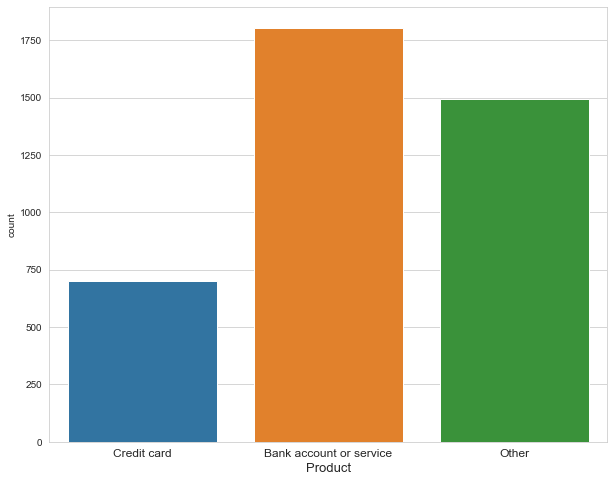

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(df['Product'])
plt.xticks(fontsize=12)
plt.xlabel('Product',fontsize=13)
plt.show()

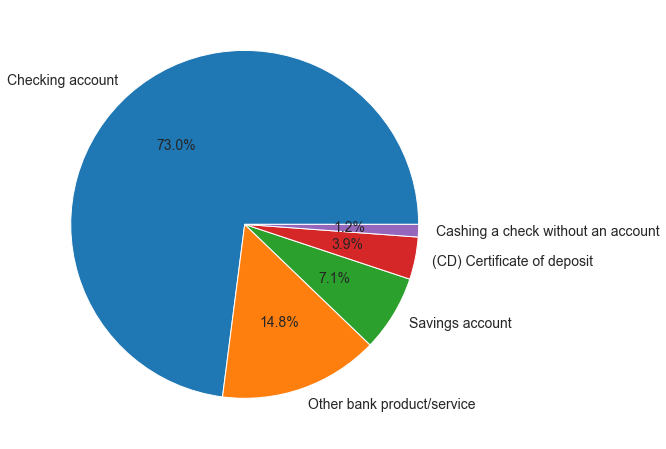

In [19]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Sub-product'].value_counts(), autopct='%.1f%%', labels= df['Sub-product'].value_counts().index, 
        textprops={'fontsize': 14})
plt.show()

In [20]:
product_grouped = df.groupby('Product').mean()
product_grouped['average_minute'] = product_grouped['ser_time(secs)']/60
product_grouped['average_minute']

Product
Bank account or service    11.640508
Credit card                11.653553
Other                       7.516198
Name: average_minute, dtype: float64

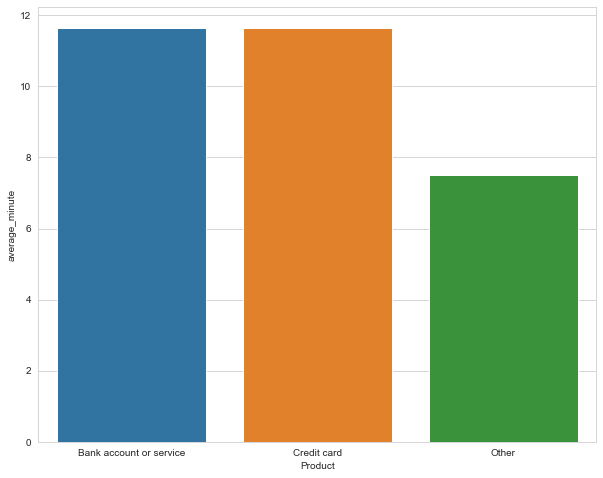

In [21]:
plt.figure(figsize=(10,8))
sns.barplot(x=product_grouped.index, y = product_grouped['average_minute'])
plt.show()

## Issue

Here are some findings i found:

- Most of the complaints has issue with **Account opening, closing, or management**, followed by **Deposits and withdrawals**.
- Highest Average Serve Time is for **Privacy** issue, while the **Account opening, closing, or management** and **Deposits and withdrawals** which is the top 2 most complaint issue has Average Serve Time of 11 minutes.

In [22]:
df['Issue'].value_counts().head(10)

Account opening, closing, or management     857
Deposits and withdrawals                    569
Problems caused by my funds being low       161
Billing disputes                            138
Making/receiving payments, sending money    120
Using a debit or ATM card                    98
Other                                        83
Closing/Cancelling account                   61
Identity theft / Fraud / Embezzlement        61
APR or interest rate                         47
Name: Issue, dtype: int64

In [23]:
issue_grouped = df.groupby('Issue').mean()
issue_grouped['average_minute'] = issue_grouped['ser_time(secs)']/60
issue_grouped['average_minute'].sort_values(ascending=False)

Issue
Privacy                                     16.350000
Application processing delay                15.800000
Cash advance fee                            14.691667
Rewards                                     14.593478
Transaction issue                           13.623684
Sale of account                             13.133333
Payoff process                              13.097059
Billing statement                           12.937255
Collection debt dispute                     12.894444
Credit card protection / Debt protection    12.734848
Forbearance / Workout plans                 12.619444
Delinquent account                          12.572727
Credit determination                        12.360417
Identity theft / Fraud / Embezzlement       12.213934
Collection practices                        12.133333
Problems caused by my funds being low       12.086957
APR or interest rate                        11.962411
Advertising and marketing                   11.875000
Bankruptcy            

## Complain Hour

- There's no real intake here since complains came at the same rate throughout the working hour, with 4 PM being the lowest since most working hour is done by that time.

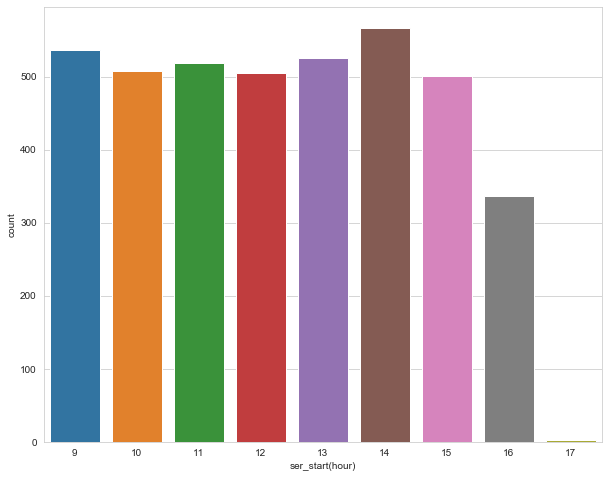

In [24]:
plt.figure(figsize=(10,8))
df['ser_start(hour)'] = pd.to_datetime(df['ser_start'], format='%H:%M:%S').dt.hour
sns.countplot(df['ser_start(hour)'])
plt.show()

## Tags

Here are some findings i found:

- 14% of the consumer are made of Older American, 5.1% Servicemember, and 3.1% Older American & Servicemember
- Maybe because they're older, they have trouble understanding our Server, Average Serve Time-wise they need 2 more minutes than usual.
- If we care about reducing our serve time, we could start making the banking system more friendly for older people or explain it better to them.

In [25]:
df['Tags'].fillna(value='No Tags', inplace=True)

In [26]:
df['Tags'].value_counts()

No Tags                          3112
Older American                    560
Servicemember                     202
Older American, Servicemember     125
Name: Tags, dtype: int64

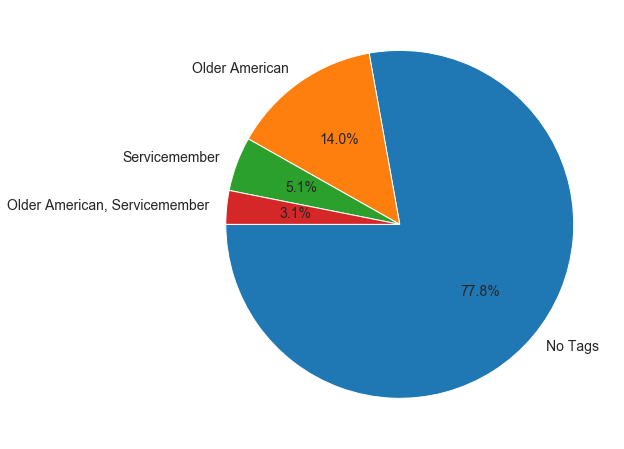

In [27]:
plt.figure(figsize=(10,8))
plt.pie(x=df['Tags'].value_counts(), autopct='%.1f%%', labels= df['Tags'].value_counts().index, 
        textprops={'fontsize': 14}, startangle=180)
plt.show()

In [28]:
tags_grouped = df.groupby('Tags').mean()
tags_grouped['average_minute'] = tags_grouped['ser_time(secs)']/60
tags_grouped['average_minute']

Tags
No Tags                           9.726007
Older American                   11.437530
Older American, Servicemember    11.332933
Servicemember                    11.409406
Name: average_minute, dtype: float64

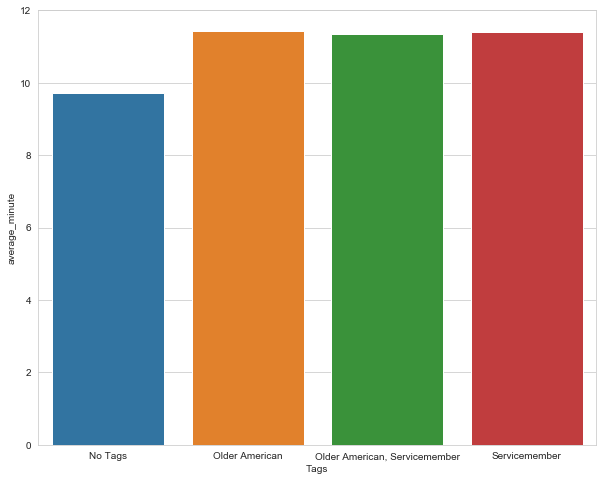

In [29]:
plt.figure(figsize=(10,8))
sns.barplot(x=tags_grouped.index ,y =tags_grouped['average_minute'])
plt.show()